# Doctor's Consultation Fees Prediction

## Problem Statement:
    Predict A Doctor's Consultation Fee 

    We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

    Size of training set: 5961 records

    Size of test set: 1987 records



  ### FEATURES:

    Qualification: Qualification and degrees held by the doctor

    Experience: Experience of the doctor in number of years

    Rating: Rating given by patients

    Profile: Type of the doctor

    Miscellaneous_Info: Extra information about the doctor

    Fees: Fees charged by the doctor (Target Variable)

    Place: Area and the city where the doctor is located.



In [948]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [949]:
data_train = pd.read_csv('Final_Train.csv')

data_test = pd.read_csv('Final_Test.csv')

In [950]:
data_train.tail(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5951,"BDS, certification in smile designing",4 years experience,NaN,"HAL, Bangalore",Dentist,Dental Restoration Restoration Aesthetics Disc...,200
5952,MBBS,47 years experience,NaN,"Bhandup West, Mumbai",General Medicine,NaN,100
5953,"MD - Homeopathy, Post Graduate Diploma in Heal...",35 years experience,92%,"Malleswaram, Bangalore",Homeopath,"92% 168 Feedback Malleswaram, Bangalore",100
5954,BHMS,31 years experience,NaN,"Adarsh Nagar, Delhi",Homeopath,NaN,300
5955,MD - Homeopathy,10 years experience,NaN,"Vijaynagar, Delhi",Homeopath,NaN,300
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [951]:
 for i in data_train:
        print(data_train[i].value_counts())

BDS                                                                                             488
BHMS                                                                                            477
BAMS                                                                                            471
MBBS                                                                                            334
MBBS, MS - ENT                                                                                  220
                                                                                               ... 
BHMS, MA - Psychology, MD - Homeopathy                                                            1
MBBS, Post Graduate Course in Diabetology, Fellowship in Diabetology                              1
MDS, BDS, Master of Clinical Dentistry                                                            1
BDS, Certificate in Implantology                                                                  1


#### OBSERVATIONS:
    - All Features are categorical Data.
    - Qualification has more information about the Doctor if the Doctor has MBBS, MD, MS,BHMS,BDS we can create more features from it.
    - Duplicate information Present. NEEd to deduping , reduce the duplication of Data/ Similar Data.
   

### CHECKING FOR NULL VALUES

In [952]:
(data_train.isnull()).sum(axis=0)

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [953]:
(data_test.isnull()).sum(axis=0)

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

#### OBSERVATIONS:
    - Rating has  55% of missing Values, with can be filled.
    - Miscellaneous_Info  has 45% missing values.
    - PLAce has missing values , very less

In [954]:
data_train[data_train['Rating'].isnull()][['Rating','Miscellaneous_Info']].tail(20)

,Rating,Miscellaneous_Info
5916,NaN,Consultation Pizhichil Ayurvedic Surgery
5917,NaN,Facial Fracture Treatment Maxilla Fracture Tre...
5919,NaN,Health Checkup (General) Vaccination/ Immuniza...
5920,NaN,NaN
5926,NaN,NaN
5932,NaN,NaN
5934,NaN,NaN
5938,NaN,NaN
5939,NaN,NaN
5941,NaN,NaN


### OBSERVATIONS
    UNABLE TO GET MISSING VALUES OF RATING FROM MISCALENEOUS COLUMN, So AS the No of Missing values are high in count and , it is a Categorical data, we can create a different category with 0 rating AS Missing Values.
    
    
## FEATURE ENGINEERING

In [955]:
### Removing % from RAting and , filling the NAN VAlues with 0, to create a different caqtegory.

data_train['Rating'] = data_train['Rating'].fillna('0%')
data_train['Rating']  = data_train['Rating'].apply(lambda x : x.replace('%',''))



In [956]:
data_test['Rating'] = data_test['Rating'].fillna('0%')
data_test['Rating']  = data_test['Rating'].apply(lambda x : x.replace('%',''))

In [957]:
## FROM EXPERIENCE COLUMN < REMOVING YEARS EXP
data_test['Experience']  = data_test['Experience'].apply(lambda x : x.split()[0])
data_train['Experience']  = data_train['Experience'].apply(lambda x : x.split()[0])

In [958]:
data_train 


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


#### WE CAN EXTRACT PLACE AND PLACE LOCATION ,2 information from PLACE and create new features.

In [959]:
data_train[data_train['Place'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
91,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
502,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100


#### OBSERVATIONS:
    - AS no of missing vlaues in Place is very less, we can remove it, but we observe the Missing vlaues data all belong to Dermatologist and  have Same qualification and same FEe, it can be usefull dAta, if we create a seperate column FOr missing Place.
    -- THis can also be considered as Duplicate Data, Lets Check


In [960]:
data_train[data_train.duplicated()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
474,BHMS,3,0,"Malleswaram, Bangalore",Homeopath,NaN,100
502,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0,0,NaN,Dermatologists,NaN,100


#### DATA HAS DUPLICATE DATA, Removing all duplicated entries

In [961]:
train_set = data_train[~data_train.duplicated()]

In [962]:
train_set

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,0,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


#### 40 rows duplicated.

In [963]:
train_set['Place'] = train_set['Place'].fillna('Missing')
data_test['Place'] = data_test['Place'].fillna('Missing')

In [964]:
train_set['CITY'] = train_set['Place'].apply(lambda x: x if (len(x.split())==1) 
                                             else x.lower().replace(' ','').split(',')[1])
train_set['CITY AREA'] = train_set['Place'].apply(lambda x: x if (len(x.split())==1) 
                                             else x.lower().replace(' ','').split(',')[0])


In [965]:
data_test['CITY'] = data_test['Place'].apply(lambda x: x if (len(x.split())==1) 
                                             else x.lower().replace(' ','').split(',')[1])
data_test['CITY AREA'] = data_test['Place'].apply(lambda x: x if (len(x.split())==1) 
                                             else x.lower().replace(' ','').split(',')[0])


In [966]:
data_test.drop('Place',inplace=True,axis=1)
train_set.drop('Place',inplace=True,axis=1)

In [967]:
train_set['CITY'].value_counts(),train_set['CITY AREA'].value_counts()

(bangalore             1256
 mumbai                1215
 delhi                 1183
 hyderabad              948
 chennai                853
 coimbatore             225
 ernakulam              153
 thiruvananthapuram      84
 Missing                  2
 sector5                  1
 e                        1
 Name: CITY, dtype: int64,
 hsrlayout          75
 andheriwest        70
 dwarka             68
 banjarahills       63
 mulundwest         54
                    ..
 kattupakkam         1
 jagritienclave      1
 mankhurd            1
 puthenvelikkara     1
 gottigerre          1
 Name: CITY AREA, Length: 865, dtype: int64)

In [968]:
train_set

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,CITY,CITY AREA
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,ernakulam,kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bangalore,whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,bangalore,mathikere-bel
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,bangalore,bannerghattaroad
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,chennai,keelkattalai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,bangalore,basavanagudi
5957,MBBS,33,0,General Medicine,NaN,100,chennai,nungambakkam
5958,MBBS,41,97,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,delhi,greaterkailashpart2
5959,"MBBS, MD - General Medicine",15,90,General Medicine,General Medical Consultation Viral Fever Treat...,100,mumbai,vileparlewest


#### OBSERVE SECTOR5, E in CITY VLAUES< Treating misspled cities

In [969]:
train_set[(train_set['CITY'] == 'e') | (train_set['CITY'] == 'sector5')]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,CITY,CITY AREA
2169,BDS,11,0,Dentist,NaN,250,sector5,dwarka
3980,BDS,23,0,Dentist,NaN,250,e,e



#### OBSERVATIONS
      - AS we can see city area of sector 5 isdwarka which is in Delhi , we can treat it.
      - We can convert e value to Missing as it is unreALISTIC.
    

In [970]:
train_set['CITY'] = train_set['CITY'].apply(lambda x: 'Missing' if (x =='e') else x)
train_set['CITY'] = train_set['CITY'].apply(lambda x: 'delhi' if (x =='sector5') else x)

In [971]:
train_set['CITY AREA'] = train_set['CITY AREA'].apply(lambda x: 'Missing' if (x =='e') else x)


In [972]:
train_set['CITY'].value_counts()

bangalore             1256
mumbai                1215
delhi                 1184
hyderabad              948
chennai                853
coimbatore             225
ernakulam              153
thiruvananthapuram      84
Missing                  3
Name: CITY, dtype: int64

In [973]:
data_test[(data_test['CITY'] == 'e') | (data_test['CITY'] == 'sector5')]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,CITY,CITY AREA


### NO ERROR IN TEST DATASET

In [974]:
data_test['CITY'].value_counts()

bangalore             420
delhi                 417
mumbai                389
hyderabad             333
chennai               287
coimbatore             70
ernakulam              48
thiruvananthapuram     17
Missing                 6
Name: CITY, dtype: int64

#### EXTRACTIING VARIOUS QUALIFACTION MOST FREQUENTLY OCCURING IN DOCTOR 

In [975]:
for i in train_set['Qualification'].values:
    if len(i.split()) >1:
        print(i)

BHMS, MD - Homeopathy
BAMS, MD - Ayurveda Medicine
MBBS, MS - Otorhinolaryngology
BSc - Zoology, BAMS
MBBS, MD - General Medicine
BSc, BDS
MBBS, MS, DNB - ENT
BDS, MDS
BDS, MDS - Oral & Maxillofacial Surgery
MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT
MBBS, MD - General Medicine
MBBS, Diploma in Otorhinolaryngology (DLO)
MBBS, MF- Homeopathy
MBBS, MS - ENT
MDS, DNB, BDS
MBBS, DNB - ENT
MBBS, Fellowship of College of General Practice (FCGP)
MBBS, DDVL
MBBS, IBCLC (USA)
MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)
BDS, MDS
Diploma in Dermatology, MBBS
MBBS, DDVL, Fellowship in Aesthetic Medicine
MBBS, MS - ENT
DM - Neurology, MD - Pediatrics, MBBS
BDS, MDS - Oral & Maxillofacial Surgery, Fellowship in Cleft Lip and Craniofacial Surgery
BHMS, Diploma in Cosmetology
MBBS, MS - ENT, DNB - ENT
MBBS, AFIH
BDS, MDS - Prosthodontist And Crown Bridge
BHMS, M. D. Hom. (Practice of Medicine)
BAMS, Diploma in Emergency Medicine, Diploma in Counselling Skills
MD

In [976]:
for i in train_set['Qualification'].values:
    if len(i.split()) >1:
        print(i)

BHMS, MD - Homeopathy
BAMS, MD - Ayurveda Medicine
MBBS, MS - Otorhinolaryngology
BSc - Zoology, BAMS
MBBS, MD - General Medicine
BSc, BDS
MBBS, MS, DNB - ENT
BDS, MDS
BDS, MDS - Oral & Maxillofacial Surgery
MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT
MBBS, MD - General Medicine
MBBS, Diploma in Otorhinolaryngology (DLO)
MBBS, MF- Homeopathy
MBBS, MS - ENT
MDS, DNB, BDS
MBBS, DNB - ENT
MBBS, Fellowship of College of General Practice (FCGP)
MBBS, DDVL
MBBS, IBCLC (USA)
MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)
BDS, MDS
Diploma in Dermatology, MBBS
MBBS, DDVL, Fellowship in Aesthetic Medicine
MBBS, MS - ENT
DM - Neurology, MD - Pediatrics, MBBS
BDS, MDS - Oral & Maxillofacial Surgery, Fellowship in Cleft Lip and Craniofacial Surgery
BHMS, Diploma in Cosmetology
MBBS, MS - ENT, DNB - ENT
MBBS, AFIH
BDS, MDS - Prosthodontist And Crown Bridge
BHMS, M. D. Hom. (Practice of Medicine)
BAMS, Diploma in Emergency Medicine, Diploma in Counselling Skills
MD

In [977]:
## CONVERTING M. D to MD
train_set['Qualification'] =train_set['Qualification'].apply(lambda x: x.replace('M. D.','MD') 
                                                             if(x.find('M. D.')) else x)

data_test['Qualification'] =data_test['Qualification'].apply(lambda x: x.replace('M. D.','MD') 
                                                             if(x.find('M. D.')) else x)

In [978]:
train_set['Qualification'] =train_set['Qualification'].apply(lambda x: x.replace(',',' ') )

data_test['Qualification'] =data_test['Qualification'].apply(lambda x: x.replace(',',' ') )

In [979]:
#' MD ',' MS ', ' DNB ',' MDS','Diploma','BAMS','BHMS','BDS','MBBS',DDVL,BIMS,DDV
count = 1
for i in train_set['Qualification']:
    if(i.find('DDV')>=0):
        print(i)
        count= count+1
    
print(count)

MBBS  DDVL
MBBS  DDVL  Fellowship in Aesthetic Medicine
MBBS  DDVL
MBBS  DDVL
MBBS  DDVL  MD - Dermatology   Venereology & Leprosy
MBBS  DDV
MBBS  DDVL
MBBS  DDV
MBBS  DDV
DDVL  Diploma in Health Administration  MD - Dermatology  MBBS
MBBS  DDVL
MBBS  DDVL
MBBS  DDV
MBBS  DDV
MBBS  DDVL
MBBS  DDVL
MBBS  DDV  DNB
DDVL  MBBS
MBBS  DDV  MD - Dermatology
MBBS  DDVL
MBBS  DDVL
MBBS  DDV
MBBS  MD - Skin & VD  DDV
MBBS  DDV
MBBS  DDVL
MBBS  DDVL
MBBS  DDV
Post Graduate Diploma in Dermotology (PGDD)  MBBS  DDVL
MBBS  DDV
MBBS  DDVL
MBBS  DDVL
MBBS  DDVL
MBBS  DDV
MD - Dermatology  DDV  Diploma in Hospital Administration
MBBS  DDV
MBBS  DDV
MBBS  DDVL  Fellowship in Pediatric Dermatology
MBBS  DDVL  MD - Dermatology   Venereology & Leprosy
MBBS  MD - Skin & VD  DDV  Fellowship in Dermatological Laser Surgery
MBBS  DDV
DDVL  MBBS
MBBS  DDV
MBBS  DDV
MBBS  MD - Dermatology  DDV
MBBS  DDV  M Derm
MBBS  DDV
MBBS  DDVL
MBBS  DDVL  Fellowship in Pediatric Dermatology
MBBS  DNB  DDV  FCPS Skin & VD
MB

#### OBSERvations:
    - FOUND MOST FREQUENT QUALIFICATIONS AS : #' MD ',' MS ',' MDS','Diploma','BAMS','BHMS','BDS','MBBS'
    - AS a Doctor details has more than one qualification , we can get dummy variable for above qualification.

In [980]:
education= set()

for i in train_set['Qualification'].values:
    if len(i.split()) == 1 :
        education.add(i)

print(education)

{'BHMS', 'G.A.M.S', 'BAMS', 'BIMS', 'BSAM', 'DDV', 'LCEH', 'DDVL', 'GCEH', 'BEMS', 'MBBS', 'BDS'}


In [981]:
count = 1
for i in train_set['Qualification'].values:
    if i.find('MBBS')>=0:
        print(i)
        count = count+1
print(count)

MBBS  MS - Otorhinolaryngology
MBBS  MD - General Medicine
MBBS  MS  DNB - ENT
MBBS  Diploma in Otorhinolaryngology (DLO)  DNB - ENT
MBBS  MD - General Medicine
MBBS  Diploma in Otorhinolaryngology (DLO)
MBBS  MF- Homeopathy
MBBS  MS - ENT
MBBS
MBBS  DNB - ENT
MBBS
MBBS  Fellowship of College of General Practice (FCGP)
MBBS  DDVL
MBBS  IBCLC (USA)
MBBS  MD - General Medicine  Post Graduate Diploma in Diabetology (PGDD)
Diploma in Dermatology  MBBS
MBBS  DDVL  Fellowship in Aesthetic Medicine
MBBS  MS - ENT
DM - Neurology  MD - Pediatrics  MBBS
MBBS  MS - ENT  DNB - ENT
MBBS  AFIH
MBBS  MD - Dermatology   Venereology & Leprosy
MBBS
MBBS  DDVL
MBBS
MBBS  DDVL
MBBS  MS - ENT  MRCS (UK)
MBBS  MD - Dermatology   Venereology & Leprosy  FRGUHS  Fellowship in Dermatological Laser Surgery
MBBS  Member of the Royal College of Physicians  UK (MRCP UK)  DNB  MNAMS- Family Medicine  MD - Medicine
MBBS  MD - General Medicine
MBBS  MD - Dermatology   Venereology & Leprosy
MBBS  DDVL  MD - Dermatology

In [982]:
train_set['has MBBS'] = train_set['Qualification'].apply(lambda x: 1 if (x.find('MBBS')>=0) else 0)

In [983]:
train_set['has MBBS'].value_counts()

0    3120
1    2801
Name: has MBBS, dtype: int64

In [984]:
data_test['has MBBS'] = data_test['Qualification'].apply(lambda x: 1 if (x.find('MBBS')>=0) else 0)
data_test['has MBBS'].value_counts()

0    1008
1     979
Name: has MBBS, dtype: int64

In [985]:
count = 1
for i in train_set['Qualification'].values:
    if i.find(' MD ')>=0:
        print(i)
        count = count+1
print(count)

BHMS  MD - Homeopathy
BAMS  MD - Ayurveda Medicine
MBBS  MD - General Medicine
MBBS  MD - General Medicine
MBBS  MD - General Medicine  Post Graduate Diploma in Diabetology (PGDD)
DM - Neurology  MD - Pediatrics  MBBS
BHMS  MD Hom. (Practice of Medicine)
MBBS  MD - Dermatology   Venereology & Leprosy
MBBS  MD - Dermatology   Venereology & Leprosy  FRGUHS  Fellowship in Dermatological Laser Surgery
MBBS  Member of the Royal College of Physicians  UK (MRCP UK)  DNB  MNAMS- Family Medicine  MD - Medicine
MBBS  MD - General Medicine
MBBS  MD - Dermatology   Venereology & Leprosy
MBBS  DDVL  MD - Dermatology   Venereology & Leprosy
MBBS  MD - Dermatology
MBBS  MD - Rheumatology
MBBS  MD - General Medicine  FRCP  Doctor of Science (DSc.)  D.LITT - Diabetology
MBBS  MD - General Medicine
MBBS  MD - Dermatology   Venereology & Leprosy
BAMS  MD - Acupuncture  Master of Hospital Administration  MS - Psychology
BHMS  MD - Homeopathy
MBBS  MD - General Medicine
MBBS  MD - Tuberculosis & Respirator

In [986]:
train_set['Has MD'] = train_set['Qualification'].apply(lambda x: 1 if (x.find(' MD ')>=0) else 0)
data_test['Has MD'] = data_test['Qualification'].apply(lambda x: 1 if (x.find('MD ')>=0) else 0)


In [987]:
train_set['Has MD'].value_counts(),data_test['Has MD'].value_counts(),

(0    4707
 1    1214
 Name: Has MD, dtype: int64,
 0    1469
 1     518
 Name: Has MD, dtype: int64)

In [988]:
count = 1
for i in train_set['Qualification'].values:
    if ((i.find('Diploma')>=0) | (i.find('diploma')>=0)):
        print(i)
        count = count+1
print(count)

MBBS  Diploma in Otorhinolaryngology (DLO)  DNB - ENT
MBBS  Diploma in Otorhinolaryngology (DLO)
MBBS  MD - General Medicine  Post Graduate Diploma in Diabetology (PGDD)
Diploma in Dermatology  MBBS
BHMS  Diploma in Cosmetology
BAMS  Diploma in Emergency Medicine  Diploma in Counselling Skills
MD - Homeopathy  DHMS (Diploma in Homeopathic Medicine and Surgery)
BHMS  Diploma In Skin Aesthetics
BAMS  Post Graduate Diploma in Emergency Services (PGDEMS)
MBBS  Diploma in Dermatology
BDS  P.G Diploma in Aesthetic Dentistry
MBBS  Diploma in Otorhinolaryngology (DLO)
MS - General Surgery  Diploma in Otorhinolaryngology (DLO)
DDVL  Diploma in Health Administration  MD - Dermatology  MBBS
MBBS  Diploma in Dermatology
MBBS  Diploma in Otorhinolaryngology (DLO)
MBBS  Diploma in Otorhinolaryngology (DLO)  MRCS (UK)
DHMS (Diploma in Homeopathic Medicine and Surgery)
MS - ENT  DNB - ENT  Diploma in Otorhinolaryngology (DLO)
MBBS  MD - General Medicine  Member of the Royal Society for the Promotion o

In [989]:
train_set['Has Diploma'] = train_set['Qualification'].apply(lambda i: 1 
                                                       if ((i.find('Diploma')>=0) | (i.find('diploma')>=0))
                                                            else 0)
                                                       
data_test['Has Diploma'] = data_test['Qualification'].apply(lambda i: 1
                                                       if ((i.find('Diploma')>=0) | (i.find('diploma')>=0) )
                                                       else 0)
train_set['Has Diploma'].value_counts(),data_test['Has Diploma'].value_counts(),

(0    5203
 1     718
 Name: Has Diploma, dtype: int64,
 0    1720
 1     267
 Name: Has Diploma, dtype: int64)

In [990]:
count = 1
for i in train_set['Qualification'].values:
    if ( (i.find('MS ')==0) | (i.find(' MS ')>0)  ):
        print(i)
        count = count+1
print(count)

MBBS  MS - Otorhinolaryngology
MBBS  MS  DNB - ENT
MBBS  MS - ENT
MBBS  MS - ENT
MBBS  MS - ENT  DNB - ENT
MBBS  MS - ENT  MRCS (UK)
BHMS  MS - Psychology
MBBS  MS - ENT
MBBS  MS - Otorhinolaryngology
BAMS  MD - Acupuncture  Master of Hospital Administration  MS - Psychology
MBBS  MS - Otorhinolaryngology
BAMS  MS - Ayurveda
BAMS  MS - Ayurveda
MS - General Surgery  Diploma in Otorhinolaryngology (DLO)
MBBS  MS - ENT  DNB - ENT  FRCS - General Surgery
MBBS  MS - ENT
MBBS  MS - ENT
MBBS  MS - ENT
MS - ENT  DNB - ENT  Diploma in Otorhinolaryngology (DLO)
BHMS  MD - Homeopathy  MS - Psychology
BDS  MS - Pediatric
MS - ENT  MBBS
MBBS  MS - ENT  MRCS (UK)
BAMS  MS (Shalyatantra)  MSc - Yoga
MBBS  MS - ENT  DLO
MBBS  MS - ENT  DNB - ENT
MBBS  MD - Alternate Medicine  Post Graduate Diploma in Counselling & Psychotherapy  MS - Counselling & Psychotherapy  PhD - Alternative Medicine
MBBS  MS - ENT
MBBS  MS - ENT
MBBS  MS - General Surgery  DNB
MS - Otorhinolaryngology
MBBS  MS - ENT
MBBS  MS - 

In [991]:
train_set['Has MS'] = train_set['Qualification'].apply(lambda i: 1 
                                                      if ( (i.find('MS ')==0) | (i.find(' MS ')>0)  )
                                                            else 0)
                                                       
data_test['Has MS'] = data_test['Qualification'].apply(lambda i: 1
                                                       if ( (i.find('MS ')==0) | (i.find(' MS ')>0)  )
                                                       else 0)
train_set['Has MS'].value_counts(),data_test['Has MS'].value_counts()

(0    5297
 1     624
 Name: Has MS, dtype: int64,
 0    1779
 1     208
 Name: Has MS, dtype: int64)

In [992]:
count = 1
for i in train_set['Qualification'].values:
    if ( (i.find('MDS')>=0)  ):
        print(i)
        count = count+1
print(count)

BDS  MDS
BDS  MDS - Oral & Maxillofacial Surgery
MDS  DNB  BDS
BDS  MDS
BDS  MDS - Oral & Maxillofacial Surgery  Fellowship in Cleft Lip and Craniofacial Surgery
BDS  MDS - Prosthodontist And Crown Bridge
BDS  MDS - Oral and Maxillofacial Pathology
BDS  MDS - Oral & Maxillofacial Surgery  MFDS RCS
BDS  MDS
MDS - Prosthodontist And Crown Bridge  BDS
MDS - Oral & Maxillofacial Surgery  BDS
MDS - Periodontology and Oral Implantology  Certificate in Cosmetic Dentistry  Post Graduate Certificate in Endodontics (PGCE)  BDS  Fellow of Academy of General Education (FAGE)
BDS  MDS - Prosthodontist And Crown Bridge
BDS  MDS - Paedodontics And Preventive Dentistry
MDS-Oral Pathology and Oral Microbiology  BDS
BDS  MDS - Conservative Dentistry & Endodontics
BDS  MDS - Conservative Dentistry & Endodontics  FICD
BDS  MDS - Periodontology and Oral Implantology
BDS  MDS - Conservative Dentistry & Endodontics  Fellow of Academy of General Education (FAGE)  BA
BDS  MDS - Periodontics
BDS  MDS - Pedodont

In [993]:
train_set['Has MDS'] = train_set['Qualification'].apply(lambda i: 1 
                                                      if  (i.find('MDS')>=0)  
                                                            else 0)
                                                       
data_test['Has MDS'] = data_test['Qualification'].apply(lambda i: 1
                                                         if (i.find('MDS')>=0)  
                                                       else 0)
train_set['Has MDS'].value_counts(),data_test['Has MDS'].value_counts(),

(0    5161
 1     760
 Name: Has MDS, dtype: int64,
 0    1747
 1     240
 Name: Has MDS, dtype: int64)

In [994]:
train_set['Has BAMS'] = train_set['Qualification'].apply(lambda i: 1 
                                                      if  (i.find('BAMS')>=0)  
                                                            else 0)
                                                       
data_test['Has BAMS'] = data_test['Qualification'].apply(lambda i: 1
                                                         if (i.find('BAMS')>=0)  
                                                       else 0)
train_set['Has BAMS'].value_counts(),data_test['Has BAMS'].value_counts(),

(0    5163
 1     758
 Name: Has BAMS, dtype: int64,
 0    1744
 1     243
 Name: Has BAMS, dtype: int64)

In [995]:
train_set['Has BHMS'] = train_set['Qualification'].apply(lambda i: 1 
                                                      if  (i.find('BHMS')>=0)  
                                                            else 0)
                                                       
data_test['Has BHMS'] = data_test['Qualification'].apply(lambda i: 1
                                                         if (i.find('BHMS')>=0)  
                                                       else 0)
train_set['Has BHMS'].value_counts(),data_test['Has BHMS'].value_counts(),

(0    5176
 1     745
 Name: Has BHMS, dtype: int64,
 0    1739
 1     248
 Name: Has BHMS, dtype: int64)

In [996]:
train_set['Has BDS'] = train_set['Qualification'].apply(lambda i: 1 
                                                      if  (i.find('BDS')>=0)  
                                                            else 0)
                                                       
data_test['Has BDS'] = data_test['Qualification'].apply(lambda i: 1
                                                         if (i.find('BDS')>=0)  
                                                       else 0)
train_set['Has BDS'].value_counts(),data_test['Has BDS'].value_counts(),

(0    4565
 1    1356
 Name: Has BDS, dtype: int64,
 0    1559
 1     428
 Name: Has BDS, dtype: int64)

In [997]:
data_test

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,MBBS,35,0,General Medicine,NaN,mumbai,ghatkopareast,1,0,0,0,0,0,0,0
1,MBBS Diploma in Otorhinolaryngology (DLO),31,0,ENT Specialist,NaN,hyderabad,westmarredpally,1,0,1,0,0,0,0,0
2,MBBS DDVL,40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",chennai,kknagar,1,0,0,0,0,0,0,0
3,BAMS,0,0,Ayurveda,NaN,delhi,newashoknagar,0,0,0,0,0,1,0,0
4,BDS MDS - Conservative Dentistry & Endodontics,16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,bangalore,kanakpuraroad,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,BAMS Doctor of Medicine,10,0,Ayurveda,NaN,bangalore,basavanagudi,0,0,0,0,0,1,0,0
1983,MD - Dermatology Venereology & Leprosy MBBS,4,0,Dermatologists,NaN,chennai,choolai,1,1,0,0,0,0,0,0
1984,MBBS MD / MS - Obstetrics & Gynaecology,9,0,General Medicine,NaN,chennai,porur,1,1,0,1,0,0,0,0
1985,BDS,12,98,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bangalore,arekere,0,0,0,0,0,0,0,1


In [998]:
train_set['Miscellaneous_Info']= train_set['Miscellaneous_Info'].fillna('missing')
  

In [999]:
count = 0
for i in train_set['Miscellaneous_Info'].values:
    if i.find('Feedback')>0:
        print(i)
        count = count+1
print(count)

100% 16 Feedback Kakkanad, Ernakulam
98% 76 Feedback Whitefield, Bangalore
100% 4 Feedback Keelkattalai, Chennai
98% 14 Feedback Coimbatore Racecourse, Coimbatore
79% 8 Feedback KPHB, Hyderabad
100% 4 Feedback HSR Layout, Bangalore
100% 7 Feedback Pollachi, Coimbatore
100% 46 Feedback HSR Layout, Bangalore
95% 6 Feedback Kukatpally, Hyderabad
97% 60 Feedback Defence Colony, Delhi
97% 18 Feedback Banjara Hills, Hyderabad
88% 2 Feedback Mogappair East, Chennai
90% 2 Feedback Borivali West, Mumbai
80% 3 Feedback Saket, Delhi
100% 21 Feedback Dahisar West, Mumbai
100% 7 Feedback RT Nagar, Bangalore
93% 42 Feedback Madhapur, Hyderabad
36% 7 Feedback Whitefield, Bangalore
97% 65 Feedback Bannerghatta Road, Bangalore
3 Feedback Kodambakkam, Chennai ₹500
99% 54 Feedback Malleswaram, Bangalore
1 Feedback Pallikaranai, Chennai ₹500
100% 43 Feedback HSR Layout, Bangalore
78% 24 Feedback Himayat Nagar, Hyderabad
99% 44 Feedback Punjabi Bagh, Delhi
87% 3 Feedback Attapur, Hyderabad
93% 9 Feedback L

In [1000]:
train_set.shape

(5921, 16)

In [1001]:
train_set.drop('Qualification',axis=1,inplace=True)
data_test.drop('Qualification',axis=1,inplace=True)

In [1002]:
train_set.drop('Miscellaneous_Info',axis=1,inplace=True)
data_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [1003]:
train_set


,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,Homeopath,100,ernakulam,kakkanad,0,1,0,0,0,0,1,0
1,12,98,Ayurveda,350,bangalore,whitefield,0,1,0,0,0,1,0,0
2,9,0,ENT Specialist,300,bangalore,mathikere-bel,1,0,0,1,0,0,0,0
3,12,0,Ayurveda,250,bangalore,bannerghattaroad,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,chennai,keelkattalai,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,bangalore,basavanagudi,1,0,0,1,0,0,0,0
5957,33,0,General Medicine,100,chennai,nungambakkam,1,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,delhi,greaterkailashpart2,1,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,mumbai,vileparlewest,1,1,0,0,0,0,0,0


### EDA

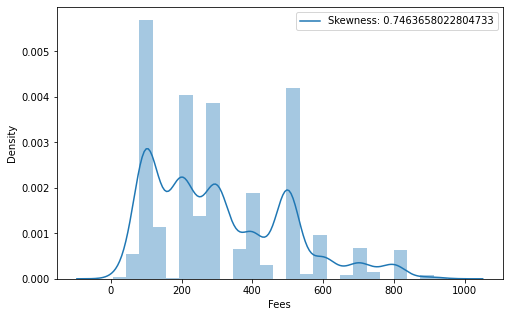

In [1004]:
plt.figure(figsize=(8,5))
sb.distplot(train_set['Fees'])
leg = 'Skewness: '+str(train_set['Fees'].skew())
plt.legend([leg])

<AxesSubplot:xlabel='Fees'>

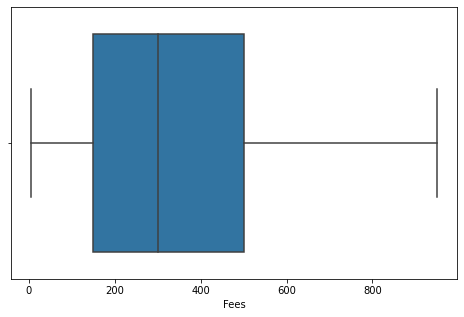

In [1005]:
plt.figure(figsize=(8,5))
sb.boxplot(train_set['Fees'])

#### OBSERVATIONS:
    - NO outliers in Target Variable, Target Varialbel is skewed

In [1006]:
train_set

,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,Homeopath,100,ernakulam,kakkanad,0,1,0,0,0,0,1,0
1,12,98,Ayurveda,350,bangalore,whitefield,0,1,0,0,0,1,0,0
2,9,0,ENT Specialist,300,bangalore,mathikere-bel,1,0,0,1,0,0,0,0
3,12,0,Ayurveda,250,bangalore,bannerghattaroad,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,chennai,keelkattalai,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,bangalore,basavanagudi,1,0,0,1,0,0,0,0
5957,33,0,General Medicine,100,chennai,nungambakkam,1,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,delhi,greaterkailashpart2,1,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,mumbai,vileparlewest,1,1,0,0,0,0,0,0


<AxesSubplot:xlabel='Profile', ylabel='Fees'>

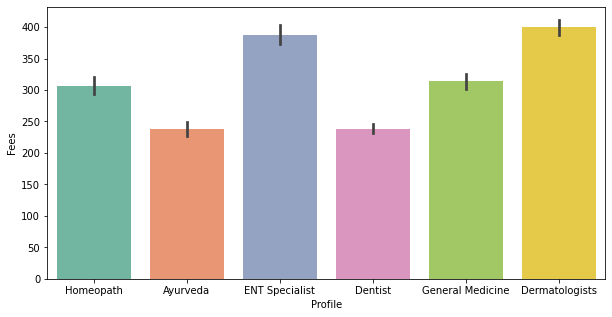

In [1007]:
plt.figure(figsize=(10,5))
sb.barplot(train_set['Profile'],train_set['Fees'],palette='Set2')

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

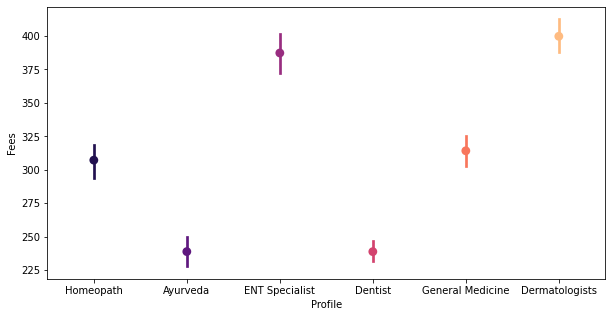

In [1008]:
plt.figure(figsize=(10,5))
sb.pointplot(train_set['Profile'],train_set['Fees'],palette='magma')

#### OBSERVATIONS:
    - ENT SPECIALIST / DERMATOLOGIST HAVS HIGHEST CONSULTATION FEE.
    - Ayurvedic and Dentist has lower average consultation fees.
    - WE can obser the Mean value of all the Profiles.

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

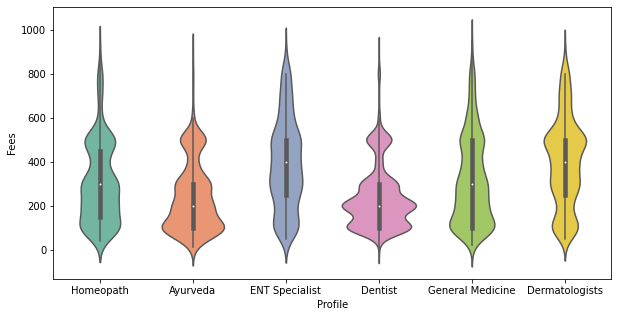

In [1009]:
plt.figure(figsize=(10,5))
sb.violinplot(train_set['Profile'],train_set['Fees'],palette='Set2')

#### OBSERVATIONS:
    - CONSULTATION FEE HIGHER THAN 600 are most in Dermatology, ENT Speicalist.
    - Lowest range of proces in Ayurveda/ dentist. general medicine.
    - Homeopathy has equally spread prices between 0-400. .Where as ayurveda has concentrated fees between 50-150 range.
    

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

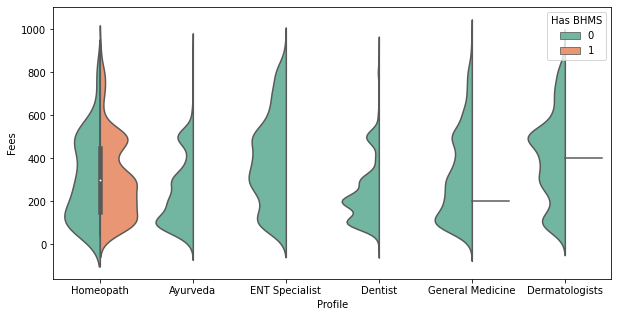

In [1010]:
plt.figure(figsize=(10,5))
sb.violinplot(train_set['Profile'],train_set['Fees'],hue= train_set['Has BHMS'],palette='Set2',split=True)

        -------WE See ONly HOMEOPATHY HAS BHMS ------

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

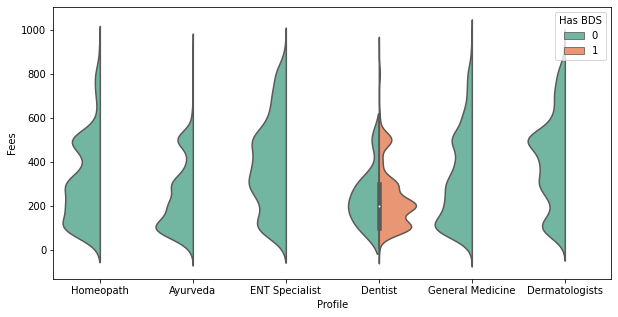

In [1011]:
plt.figure(figsize=(10,5))
sb.violinplot(train_set['Profile'],train_set['Fees'],hue= train_set['Has BDS'],palette='Set2',split=True)

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

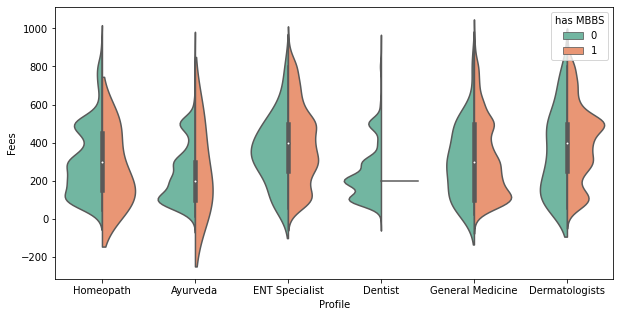

In [1012]:
plt.figure(figsize=(10,5))
sb.violinplot(train_set['Profile'],train_set['Fees'],hue= train_set['has MBBS'],palette='Set2',split=True)

             - Dentist profile doesnot have mbbs,BDS values are onyl in Dentist profile.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ernakulam'),
  Text(1, 0, 'bangalore'),
  Text(2, 0, 'chennai'),
  Text(3, 0, 'delhi'),
  Text(4, 0, 'hyderabad'),
  Text(5, 0, 'coimbatore'),
  Text(6, 0, 'mumbai'),
  Text(7, 0, 'thiruvananthapuram'),
  Text(8, 0, 'Missing')])

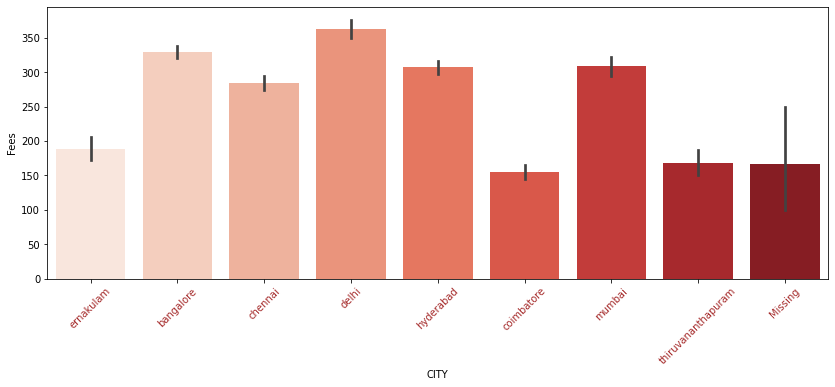

In [1013]:
plt.figure(figsize=(14,5))
sb.barplot(train_set['CITY'],train_set['Fees'],palette='Reds')
plt.xticks(rotation=45,c='brown')

##### HIGHEST FEES FOR DELHI CITY, then HYDRABAD AND MUMBAI AND BANGALORE.
##### LOWEST FOR ERNAKULAM, COIMBATORE, missing city values, 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ernakulam'),
  Text(1, 0, 'bangalore'),
  Text(2, 0, 'chennai'),
  Text(3, 0, 'delhi'),
  Text(4, 0, 'hyderabad'),
  Text(5, 0, 'coimbatore'),
  Text(6, 0, 'mumbai'),
  Text(7, 0, 'thiruvananthapuram'),
  Text(8, 0, 'Missing')])

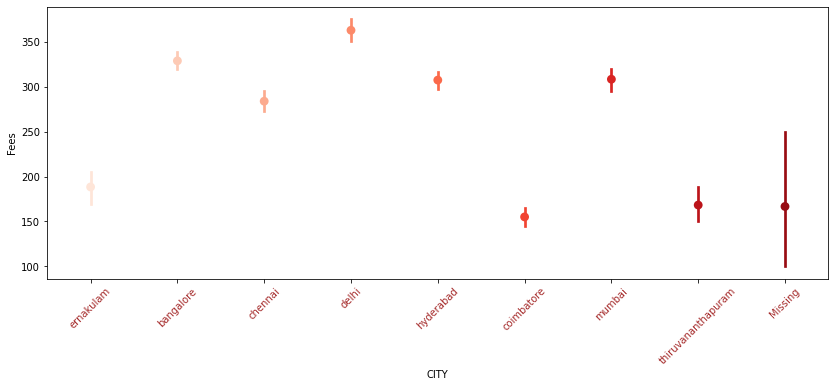

In [1014]:
plt.figure(figsize=(14,5))
sb.pointplot(train_set['CITY'],train_set['Fees'],palette='Reds')
plt.xticks(rotation=45,c='brown')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ernakulam'),
  Text(1, 0, 'bangalore'),
  Text(2, 0, 'chennai'),
  Text(3, 0, 'delhi'),
  Text(4, 0, 'hyderabad'),
  Text(5, 0, 'coimbatore'),
  Text(6, 0, 'mumbai'),
  Text(7, 0, 'thiruvananthapuram'),
  Text(8, 0, 'Missing')])

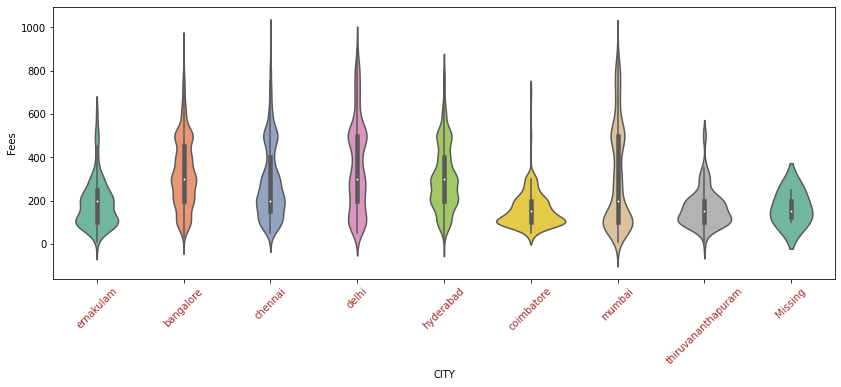

In [1015]:
plt.figure(figsize=(14,5))
sb.violinplot(train_set['CITY'],train_set['Fees'],palette='Set2')
plt.xticks(rotation=45,c='brown')

##### CONCENTRATED VALUES FOR COIMBATORE / THiruvanathapuram/ ernakulam NEAR 100
##### 

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

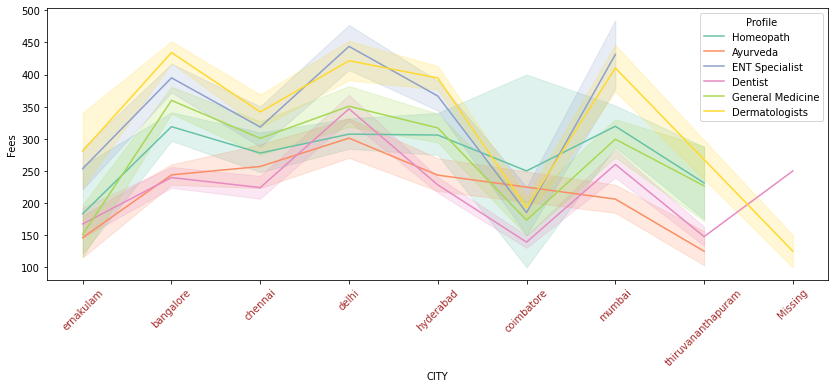

In [1016]:
plt.figure(figsize=(14,5))
sb.lineplot(train_set['CITY'],train_set['Fees'],hue=train_set['Profile'],palette='Set2')
plt.xticks(rotation=45,c='brown')

#### ENT SPecialist has highest fees in Delhi and lowest in Coimbatore.
#### DERmologist has highest fees in mumbai and lowest in coimbatore.
#### Homeopathy has highest fees in bangalore/mumbai and losest in ernakulam.
#### Ayurveda has lowest fees  in thiruvanthapuram and highest in delhi.
#### General medicie has highest fees inbangalore and lowest in ernakulam.
#### Dentist has highest fees in coimbatore and highest in Delhi.#

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

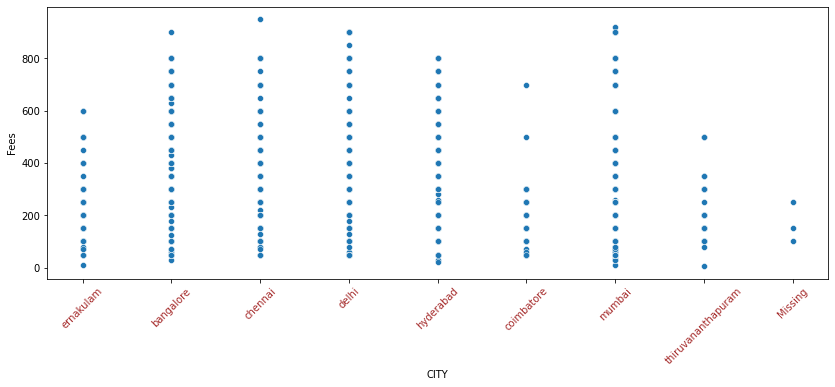

In [1017]:
plt.figure(figsize=(14,5))
sb.scatterplot(train_set['CITY'],train_set['Fees'],palette='Set2')
plt.xticks(rotation=45,c='brown')

In [1018]:
train_set

,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,Homeopath,100,ernakulam,kakkanad,0,1,0,0,0,0,1,0
1,12,98,Ayurveda,350,bangalore,whitefield,0,1,0,0,0,1,0,0
2,9,0,ENT Specialist,300,bangalore,mathikere-bel,1,0,0,1,0,0,0,0
3,12,0,Ayurveda,250,bangalore,bannerghattaroad,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,chennai,keelkattalai,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,bangalore,basavanagudi,1,0,0,1,0,0,0,0
5957,33,0,General Medicine,100,chennai,nungambakkam,1,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,delhi,greaterkailashpart2,1,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,mumbai,vileparlewest,1,1,0,0,0,0,0,0


In [1019]:
train_set['Experience'] = train_set['Experience'].astype('int')
train_set['Rating'] = train_set['Rating'].astype('int')
data_test['Experience'] = data_test['Experience'].astype('int')
data_test['Rating'] = data_test['Rating'].astype('int')

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

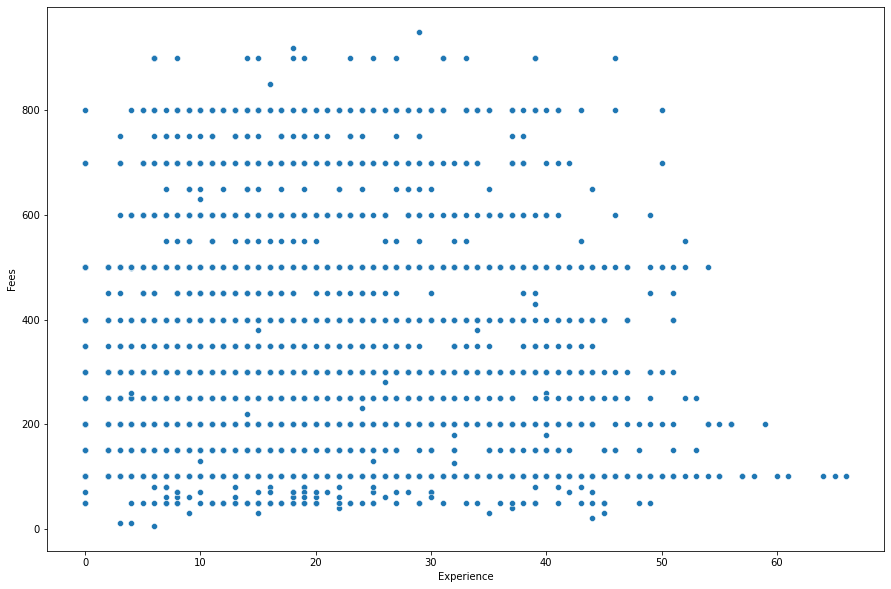

In [1020]:
plt.figure(figsize=(15,10))
sb.scatterplot(train_set['Experience'] ,train_set['Fees'])

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

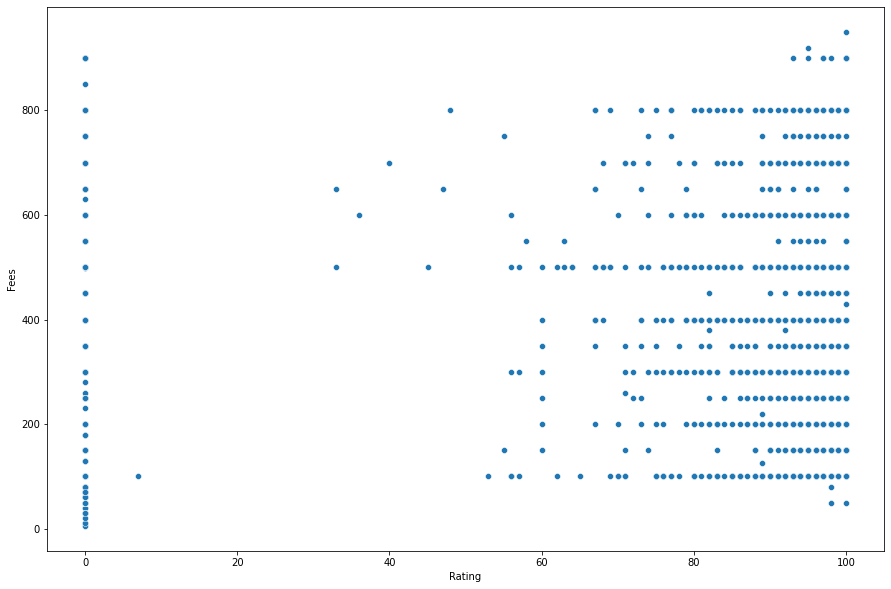

In [1021]:
plt.figure(figsize=(15,10))
sb.scatterplot(train_set['Rating'] ,train_set['Fees'])

#### EVENLY SPREAD RATING/ EXPIRIENCE WITH THE FEES

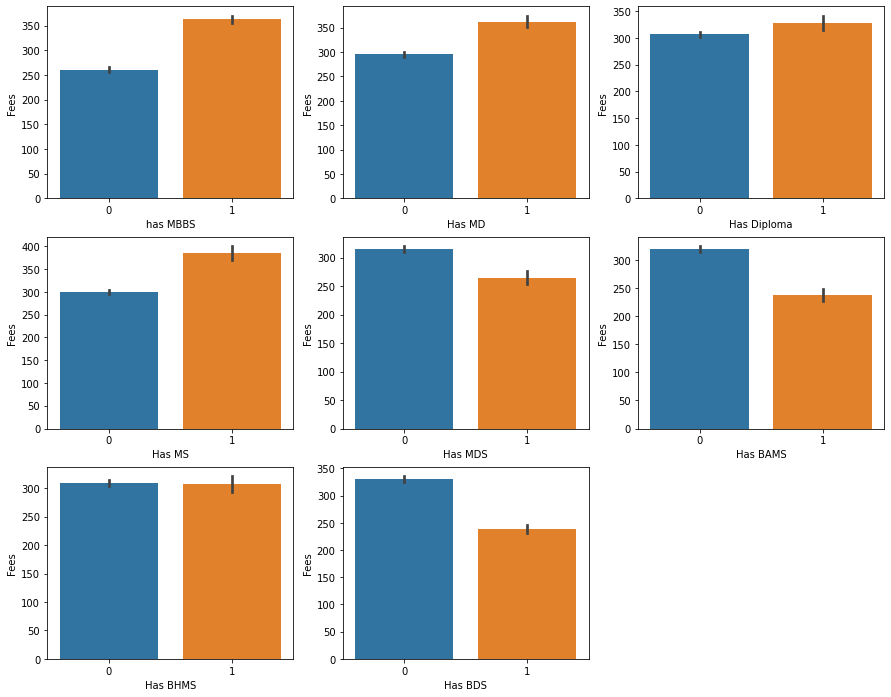

In [1022]:
count = 1
plt.figure(figsize=(15,12))
for i in train_set.columns[-8:]:
    plt.subplot(3,3,count)
    count = count+1
    sb.barplot(train_set[i],train_set['Fees'])

#### OBSERVATIONS:
    - MBBS , MDm BDS, BAMS, MDs,MS has significant difference in average Fees

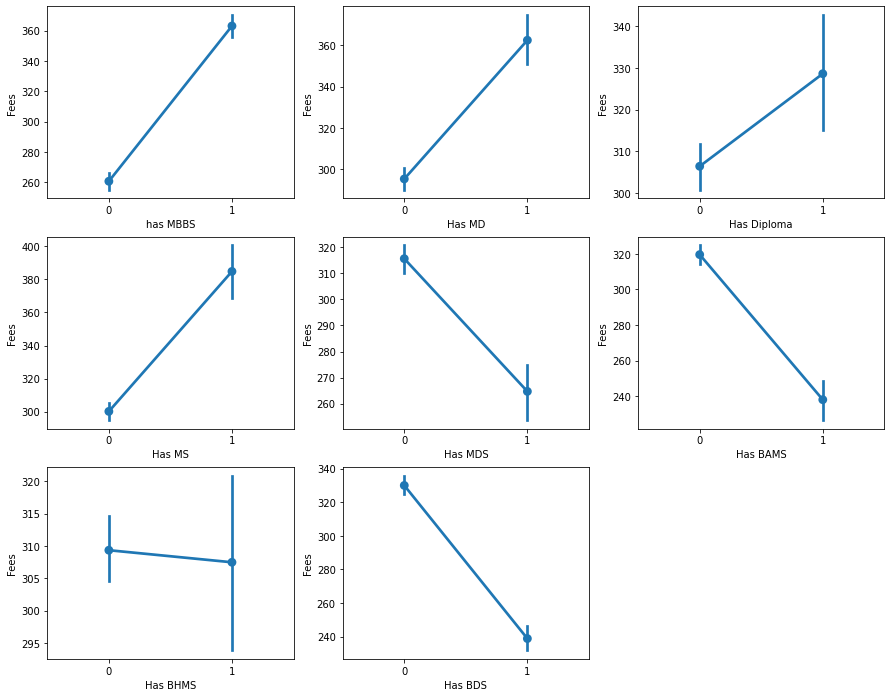

In [1023]:
count = 1
plt.figure(figsize=(15,12))
for i in train_set.columns[-8:]:
    plt.subplot(3,3,count)
    count = count+1
    sb.pointplot(train_set[i],train_set['Fees'])

<AxesSubplot:xlabel='Profile', ylabel='Rating'>

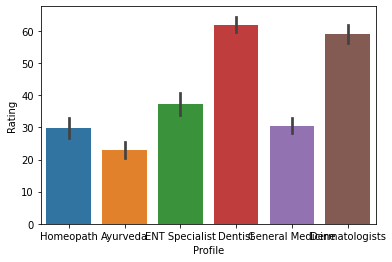

In [1024]:
sb.barplot(train_set['Profile'],train_set['Rating'])

### WE SEE THAT BHMS Does influnece much to the COnsultation Fee, we can drop that feature.

In [1025]:
train_set.dtypes

Experience      int32
Rating          int32
Profile        object
Fees            int64
CITY           object
CITY AREA      object
has MBBS        int64
Has MD          int64
Has Diploma     int64
Has MS          int64
Has MDS         int64
Has BAMS        int64
Has BHMS        int64
Has BDS         int64
dtype: object

### LABEL ENCODER FOR CITY/ AREA/ Profile

In [1026]:
train_set

,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,Homeopath,100,ernakulam,kakkanad,0,1,0,0,0,0,1,0
1,12,98,Ayurveda,350,bangalore,whitefield,0,1,0,0,0,1,0,0
2,9,0,ENT Specialist,300,bangalore,mathikere-bel,1,0,0,1,0,0,0,0
3,12,0,Ayurveda,250,bangalore,bannerghattaroad,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,chennai,keelkattalai,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,bangalore,basavanagudi,1,0,0,1,0,0,0,0
5957,33,0,General Medicine,100,chennai,nungambakkam,1,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,delhi,greaterkailashpart2,1,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,mumbai,vileparlewest,1,1,0,0,0,0,0,0


In [1027]:
from sklearn.preprocessing import LabelEncoder

In [1028]:
labeled_train = train_set

In [1029]:
labeled_train['CITY'] = LabelEncoder().fit_transform(labeled_train['CITY'] )
labeled_train['CITY AREA'] = LabelEncoder().fit_transform(labeled_train['CITY AREA'] )
labeled_train['Profile'] = LabelEncoder().fit_transform(labeled_train['Profile'] )

In [1030]:
labeled_train

,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,5,100,5,293,0,1,0,0,0,0,1,0
1,12,98,0,350,1,854,0,1,0,0,0,1,0,0
2,9,0,3,300,1,449,1,0,0,1,0,0,0,0
3,12,0,0,250,1,66,0,0,0,0,0,1,0,0
4,20,100,0,250,2,332,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,3,300,1,68,1,0,0,1,0,0,0,0
5957,33,0,4,100,2,535,1,0,0,0,0,0,0,0
5958,41,97,4,600,4,214,1,0,0,0,0,0,0,0
5959,15,90,4,100,7,838,1,1,0,0,0,0,0,0


In [1031]:
labeled_train

,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,24,100,5,100,5,293,0,1,0,0,0,0,1,0
1,12,98,0,350,1,854,0,1,0,0,0,1,0,0
2,9,0,3,300,1,449,1,0,0,1,0,0,0,0
3,12,0,0,250,1,66,0,0,0,0,0,1,0,0
4,20,100,0,250,2,332,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,3,300,1,68,1,0,0,1,0,0,0,0
5957,33,0,4,100,2,535,1,0,0,0,0,0,0,0
5958,41,97,4,600,4,214,1,0,0,0,0,0,0,0
5959,15,90,4,100,7,838,1,1,0,0,0,0,0,0


In [1032]:
from sklearn.preprocessing import StandardScaler

In [1033]:
labeled_train[['CITY AREA','Rating','Experience']] = StandardScaler().fit_transform(labeled_train[['CITY AREA','Rating','Experience']])

In [1034]:
labeled_train


,Experience,Rating,Profile,Fees,CITY,CITY AREA,has MBBS,Has MD,Has Diploma,Has MS,Has MDS,Has BAMS,Has BHMS,Has BDS
0,0.596143,1.213827,5,100,5,-0.464367,0,1,0,0,0,0,1,0
1,-0.484948,1.171605,0,350,1,1.743855,0,1,0,0,0,1,0,0
2,-0.755221,-0.897267,3,300,1,0.149684,1,0,0,1,0,0,0,0
3,-0.484948,-0.897267,0,250,1,-1.357890,0,0,0,0,0,1,0,0
4,0.235779,1.213827,0,250,2,-0.310855,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.145688,1.171605,3,300,1,-1.350018,1,0,0,1,0,0,0,0
5957,1.406961,-0.897267,4,100,2,0.488199,1,0,0,0,0,0,0,0
5958,2.127688,1.150494,4,600,4,-0.775329,1,0,0,0,0,0,0,0
5959,-0.214675,1.002718,4,100,7,1.680875,1,1,0,0,0,0,0,0


<AxesSubplot:>

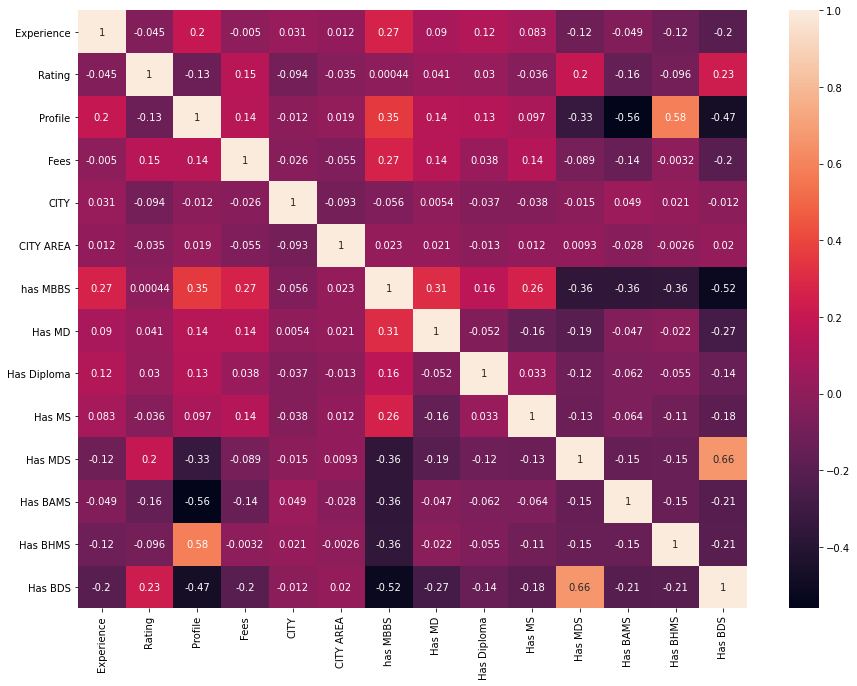

In [1035]:
plt.figure(figsize=(15,11))
sb.heatmap(labeled_train.corr(),annot=True)

#### OBSERVATIONS:
    - MULTICOLLINEARITY PRESENT, Linearregression might get effected.
    - Target Variable Fees is correlated with Has MBBS, Has MD, Has MS, has BDS, Rating , Profile.

In [1036]:
labeled_train.skew()

Experience     1.001498
Rating         0.235071
Profile        0.105133
Fees           0.746366
CITY          -0.003884
CITY AREA      0.110077
has MBBS       0.107936
Has MD         1.461595
Has Diploma    2.321044
Has MS         2.570979
Has MDS        2.222735
Has BAMS       2.227257
Has BHMS       2.257026
Has BDS        1.290118
dtype: float64

#### CONTINOUS VARIABLE DO NOT HAVE SKEWNESS, Target Variable has skewness.
- We dont treat targret variable skewness.

#### FEATURE ENGINERING WITH PCA

In [1037]:
y = labeled_train['Fees']
x = labeled_train.drop('Fees',axis=1)

In [1038]:
from sklearn.decomposition import PCA

In [1039]:
pca = PCA()

In [1040]:
pca.fit(x,y)

PCA()

(0.2, 1.0)

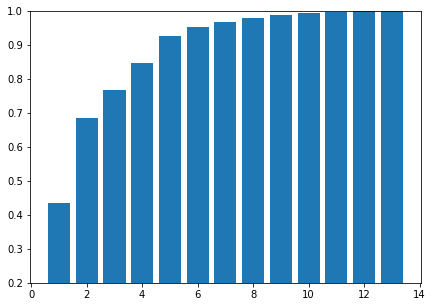

In [1041]:
plt.figure(figsize=(7,5))
plt.bar(range(1,14),np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0.2,1)

In [1042]:
pca = PCA(n_components=11)

In [1043]:
features = pca.fit_transform(x,y)

In [1044]:
pca_data = pd.DataFrame(features, columns=range(1,12))

#### 6 Components are giving upto more than 95 % information

### DATA MODELLING

In [1045]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV,cross_val_score

In [1046]:
randomstate = 0
max_score = 0
lr = LGBMRegressor()
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i

print( 'Random State=',randomstate,' and R2 Score of MODEL : ',max_score*100)

Random State= 28  and R2 Score of MODEL :  26.474243328001258


In [1047]:
np.mean(cross_val_score(lr,x,y,cv=5,scoring='r2'))

0.21422364715384462

In [1048]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=.27,random_state=randomstate)
   

In [1049]:
r2_scores = []
cv_scores = []
rmse_scores = []

In [1050]:
def model_predict(model):
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    r2score = r2_score(y_test,predictions)
    print('------------',model,'--------------')
    print(' R2 Score                : ', r2score)
    print('MAE Score                : ', mean_absolute_error(y_test,predictions))
    print('MSE Score                : ', mean_squared_error(y_test,predictions))
    print('RMSE Score               : ', np.sqrt(mean_squared_error(y_test,predictions)))
    print('Cross Validation Score   : ',np.mean(cross_val_score(model,x,y,cv=5,scoring='r2')))
    
    r2_scores.append(r2score)
    cv_scores.append(np.mean(cross_val_score(model,x,y,cv=5,scoring='r2')))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    plt.figure(figsize=(8,5))
    sb.regplot(y_test,predictions)
    plt.xlabel('Y True ')
    plt.ylabel('Y Predicted')
    
    

------------ LinearRegression() --------------
 R2 Score                :  0.1584442150341865
MAE Score                :  134.78127108093398
MSE Score                :  28074.278617831264
RMSE Score               :  167.55380812691564
Cross Validation Score   :  0.1325214151713409


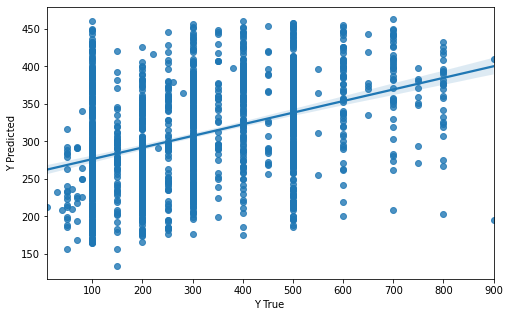

In [1051]:
model_predict(LinearRegression())

------------ Lasso() --------------
 R2 Score                :  0.15369016947944358
MAE Score                :  136.04572468451008
MSE Score                :  28232.87345117453
RMSE Score               :  168.02640700548986
Cross Validation Score   :  0.12951780952166828


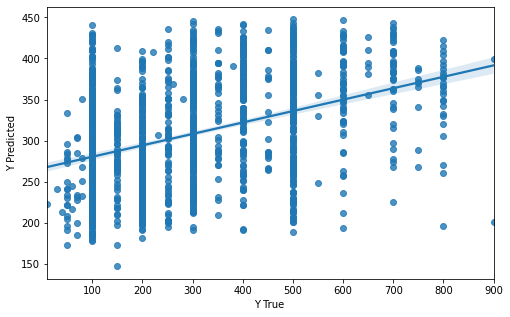

In [1052]:
model_predict(Lasso())

------------ Ridge() --------------
 R2 Score                :  0.15844152590049243
MAE Score                :  134.79994902027212
MSE Score                :  28074.36832725982
RMSE Score               :  167.55407583004308
Cross Validation Score   :  0.13254869160717148


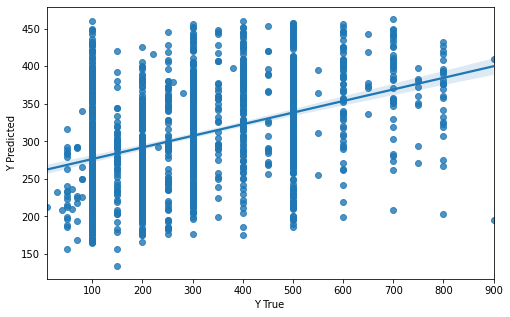

In [1053]:
model_predict(Ridge())

------------ SVR() --------------
 R2 Score                :  0.06006491356528021
MAE Score                :  140.20914580658902
MSE Score                :  31356.209499903318
RMSE Score               :  177.07684631228136
Cross Validation Score   :  0.03728960341665695


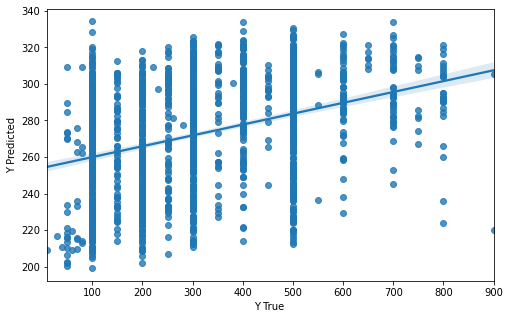

In [1054]:
model_predict(SVR())

------------ KNeighborsRegressor(n_neighbors=15) --------------
 R2 Score                :  0.19260898090277856
MAE Score                :  129.35497185741087
MSE Score                :  26934.542936557573
RMSE Score               :  164.1174668844166
Cross Validation Score   :  0.148521002373453


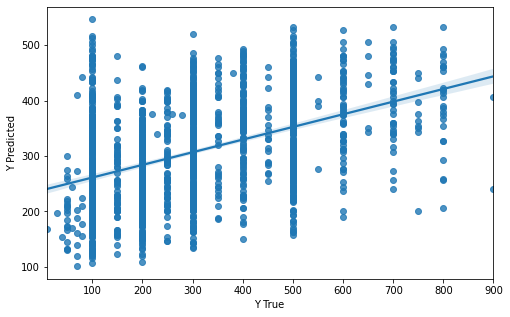

In [1055]:
model_predict(KNeighborsRegressor(n_neighbors=15))

------------ DecisionTreeRegressor(criterion='mae') --------------
 R2 Score                :  -0.5325360187492947
MAE Score                :  162.79549718574108
MSE Score                :  51125.36085053158
RMSE Score               :  226.10917904970506
Cross Validation Score   :  -0.49138855041650215


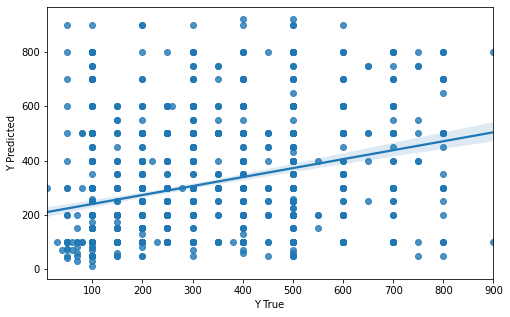

In [1056]:
model_predict(DecisionTreeRegressor(criterion='mae'))

------------ RandomForestRegressor() --------------
 R2 Score                :  0.20380732026229254
MAE Score                :  124.80095774144554
MSE Score                :  26560.966633177053
RMSE Score               :  162.97535590750232
Cross Validation Score   :  0.1601438740363239


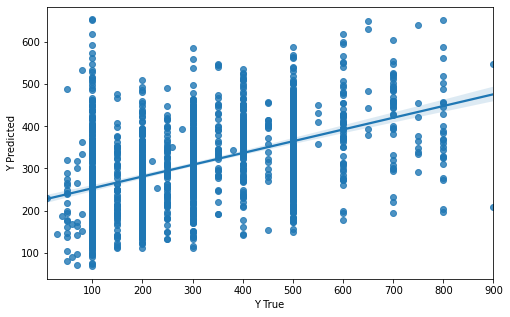

In [1057]:
model_predict(RandomForestRegressor())

------------ AdaBoostRegressor() --------------
 R2 Score                :  0.14608289310003575
MAE Score                :  139.60699706933778
MSE Score                :  28486.651988989488
RMSE Score               :  168.779892134666
Cross Validation Score   :  0.12020345406128992


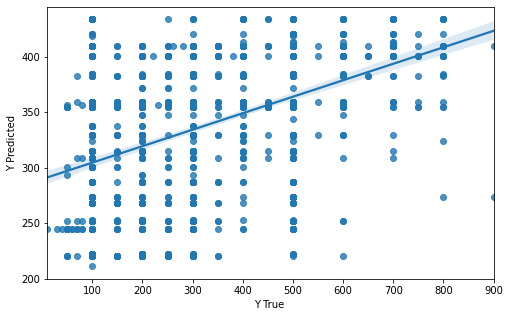

In [1058]:
model_predict(AdaBoostRegressor())

------------ GradientBoostingRegressor() --------------
 R2 Score                :  0.24669961691605524
MAE Score                :  125.39884325125097
MSE Score                :  25130.080756888623
RMSE Score               :  158.52470077842324
Cross Validation Score   :  0.20841681248425464


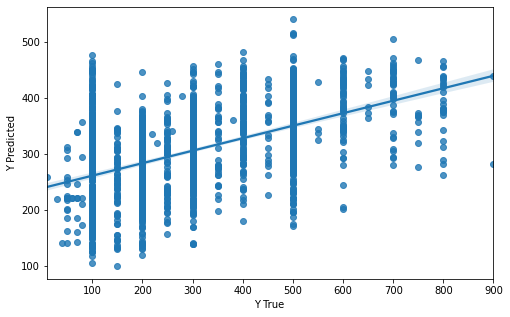

In [1059]:
model_predict(GradientBoostingRegressor())

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score                :  0.19216481099814386
MAE Score                :  124.76044235205636
MSE Score                :  26949.36043277011
RMSE Score               :  164.16260363666908
Cross Validation Score   :  0.17950795874368305


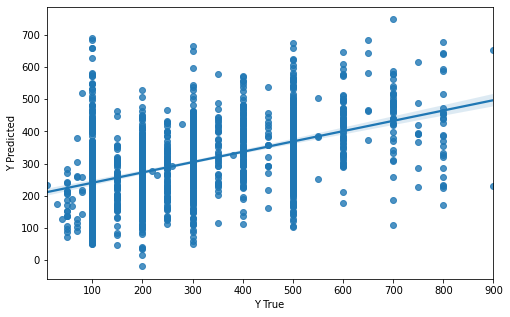

In [1060]:
model_predict(XGBRegressor())

------------ LGBMRegressor() --------------
 R2 Score                :  0.2540631955599013
MAE Score                :  121.72421664316818
MSE Score                :  24884.4319690545
RMSE Score               :  157.74800147404247
Cross Validation Score   :  0.21422364715384462


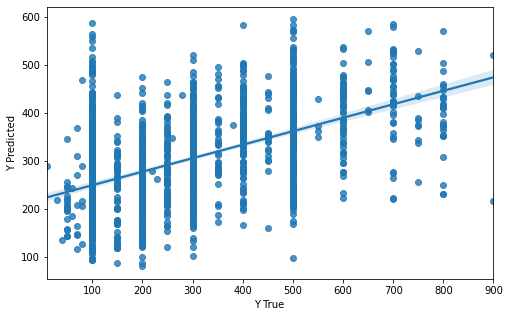

In [1061]:
model_predict(LGBMRegressor())

------------ XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) --------------
 R2 Score                :  0.21534913915907672
MAE Score                :  128.4978423890954
MSE Score                :  26175.931861562913
RMSE Score               :  161.78977675231187
Cross Validation Score   :  0.18109781136260705


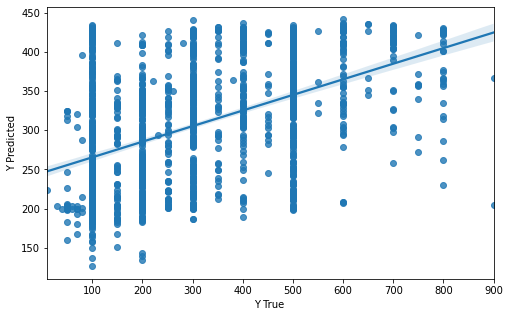

In [1062]:
model_predict(XGBRFRegressor())

In [1064]:
error = []
for i in range(0,12):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))
    

In [1065]:
tab = {
    'R2 Score': r2_scores, 
    'CV Score': cv_scores, 
    'Error/Bias (r2score - CVScore)': error,
    'RMSE Metric':rmse_scores
    
}

In [1066]:
table_models = pd.DataFrame(tab,index=['LRegression','Lasso','Ridge','SVR','KNRegressor',
                                       'DTR','RF','ADA','GB','XGBRegressor','LightGBM','XGBRF'
                                      ])

In [1067]:
table_models

,R2 Score,CV Score,Error/Bias (r2score - CVScore),RMSE Metric
LRegression,0.158444,0.132521,0.025923,167.553808
Lasso,0.153690,0.129518,0.024172,168.026407
Ridge,0.158442,0.132549,0.025893,167.554076
SVR,0.060065,0.037290,0.022775,177.076846
KNRegressor,0.192609,0.148521,0.044088,164.117467
DTR,-0.532536,-0.489163,0.043373,226.109179
RF,0.203807,0.161443,0.042365,162.975356
ADA,0.146083,0.111936,0.034147,168.779892
GB,0.246700,0.208464,0.038235,158.524701
XGBRegressor,0.192165,0.179508,0.012657,164.162604


#### OBSERVATIONS:
- AS the Biasness term is low for most of the models , we choose model with least RMSE ERROR : LightGM

#### HYPER PARAMETER TUNING LightGMRegressor

In [1068]:
params_lgbr = {
    'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
   
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
}
LightGBR = LGBMRegressor()

In [1069]:
grid_l= RandomizedSearchCV(LightGBR,params_lgbr,cv=5,scoring='r2',n_iter=25,verbose=2,n_jobs=5)

In [1070]:
grid_l.fit(x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=5,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='r2', verbose=2)

In [1072]:
grid_l.best_estimator_

LGBMRegressor(bagging_fraction=0.8, bagging_freq=10, max_depth=5, num_leaves=50)

------------ LGBMRegressor(bagging_fraction=0.8, bagging_freq=10, max_depth=5, num_leaves=50) --------------
 R2 Score                :  0.2499466120711229
MAE Score                :  123.08318200383245
MSE Score                :  25021.761084820988
RMSE Score               :  158.1826826325214
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] ba

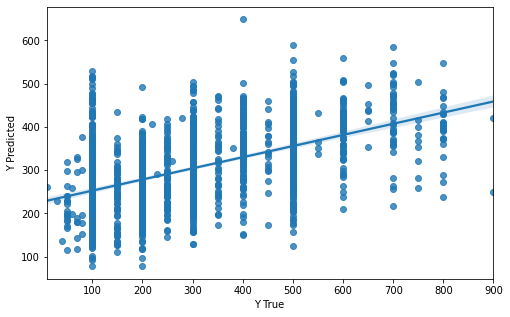

In [1073]:
model_predict(LGBMRegressor(bagging_fraction=0.8, bagging_freq=10, max_depth=5, num_leaves=50))